In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [18]:
from pymatgen.io.cif import CifParser,CifWriter
import numpy as np
from pymatgen.core import Lattice

def transform(a_reduce=0.87,angle=-180,phi=0,move=0.93):
    parser = CifParser("../data/dipoles1.cif")
    structure = parser.get_structures()[0]
    coord = structure.cart_coords[3]+structure.cart_coords[5]+structure.cart_coords[6]+structure.cart_coords[8]
    coord=coord/4
    coord[2]=coord[2]*move
    new_a=structure.lattice.a*a_reduce

    structure.rotate_sites([3,5,6,8],np.deg2rad(angle),[0,1,0],coord)
    
    structure.rotate_sites([3,5,6,8],np.deg2rad(phi),[1,0,0],coord)
    structure

    #print structure
    lattice = Lattice.from_parameters(a=new_a, b=structure.lattice.b, c=structure.lattice.c, alpha=90,
                                      beta=structure.lattice.beta, gamma=90)
    # structure.modify_lattice(lattice)
    structure.lattice = lattice
    return structure

def get_mean_distance(structure):
    k=6
    val1=[]
    val2=[]
    dist1=[]
    dist2=[]
    for i in structure.get_neighbors(structure[2],10):
            if i[0].species_string=="Cl":
                dist1.append(i[1])
    val1.append(np.sort(dist1)[0:k])
    for i in structure.get_neighbors(structure[3],10):
            if i[0].species_string=="Cl":
                dist2.append(i[1])
    val2.append(np.sort(dist2)[0:k])
    return np.mean([val1,val2])

def get_mean_distance_angle(theta,phi):
    structure=transform(a_reduce=1,angle=theta,phi=phi,move=1)
    return get_mean_distance(structure)

In [76]:
def create_spehircal_mesh_points(n):
    t=np.linspace(0,np.rad2deg(2*np.pi),n)
    p=np.linspace(0,np.rad2deg(2*np.pi),n)
    return t,p

nk=11
t,p=create_spehircal_mesh_points(nk)

In [77]:
# get_mean_distance_angle(theta=i,phi=j)
angles_distance=np.array([get_mean_distance_angle(theta=i,phi=j) for i in t for j in p]).reshape(nk,nk)


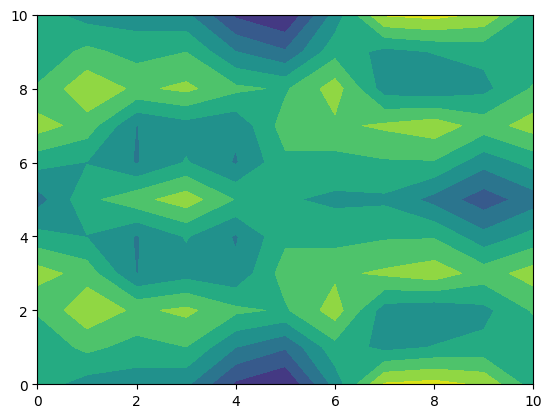

In [78]:
plt.contourf(angles_distance.T)

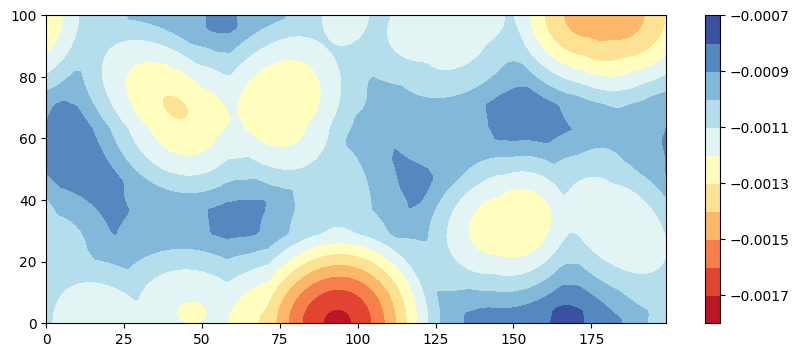

In [6]:

angles_dist=pickle.load(open("../data/angles_nn_distance.pickle", "rb"))
LJpotential=lambda eps,r0: eps*((r0/angles_dist)**12 - (r0/angles_dist)**6)
fig,ax=plt.subplots(1,1,figsize=(10,4))
plt.contourf(LJpotential(1,1),10,cmap="RdYlBu")
plt.colorbar()
